# Example 2: An Illustration of Recovery for a Function with Variable Interactions

In [1]:
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

sns.set_style("whitegrid")
sns.set_context("notebook", rc={'axes.linewidth': 2, 'grid.linewidth': 1},  font_scale=1.5)

import numpy as np
from itertools import product

import nshap

### The function

In [2]:
np.random.seed(123)
X_train = np.random.normal(loc=0.1, size=(1000,2))
X_test = np.random.normal(loc=0.1, size=(100,2))

def f(x):
    if x.ndim == 2:
        x = x[0]
    return x[0]*x[1]

f(X_test[0])

1.8439518219711026

### This function consists mostly of variable interaction of order 2, so the partial dependence plots of Shapley Values don't have any clear structure

In [3]:
vfunc = nshap.vfunc.interventional_shap(f, X_train)

In [4]:
n_shapley_values = []
for x in X_test:
    n_shapley_values.append(nshap.n_shapley_values(x, vfunc))

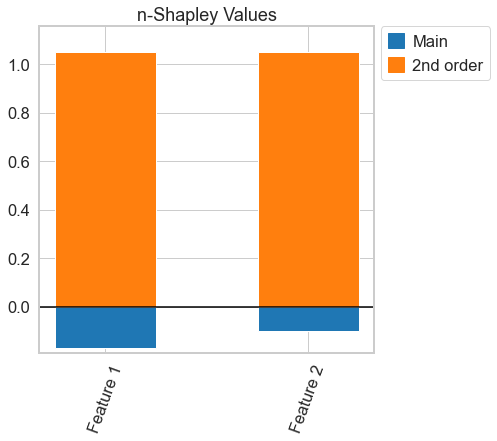

In [5]:
n_shapley_values[0].plot()
plt.show()

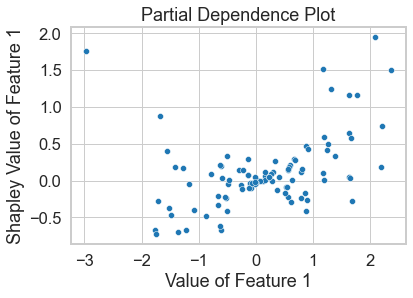

In [6]:
sns.scatterplot(x=[x[0] for x in X_test], y=[x.shapley_values()[0][0] for x in n_shapley_values])
plt.xlabel('Value of Feature 1')
plt.ylabel('Shapley Value of Feature 1')
plt.title('Partial Dependence Plot')
plt.show()

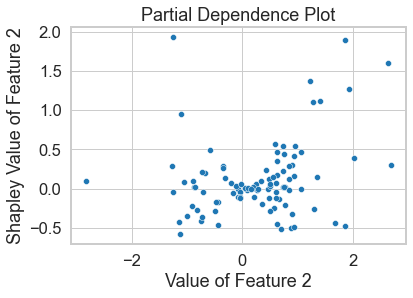

In [7]:
sns.scatterplot(x=[x[1] for x in X_test], y=[x.shapley_values()[0][1] for x in n_shapley_values])
plt.xlabel('Value of Feature 2')
plt.ylabel('Shapley Value of Feature 2')
plt.title('Partial Dependence Plot')
plt.show()

### 2-Shapley Values provide a representation of the function as a GAM

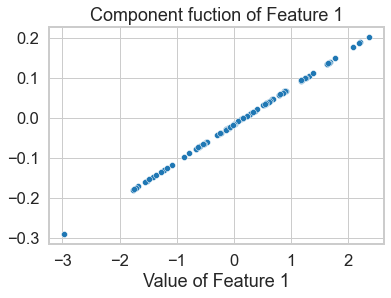

In [8]:
sns.scatterplot(x=[x[0] for x in X_test], y=[x[(0,)] for x in n_shapley_values])
plt.xlabel('Value of Feature 1')
plt.title('Component fuction of Feature 1')
plt.show()

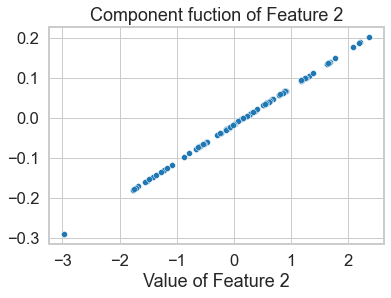

In [9]:
sns.scatterplot(x=[x[0] for x in X_test], y=[x[(0,)] for x in n_shapley_values])
plt.xlabel('Value of Feature 2')
plt.title('Component fuction of Feature 2')
plt.show()

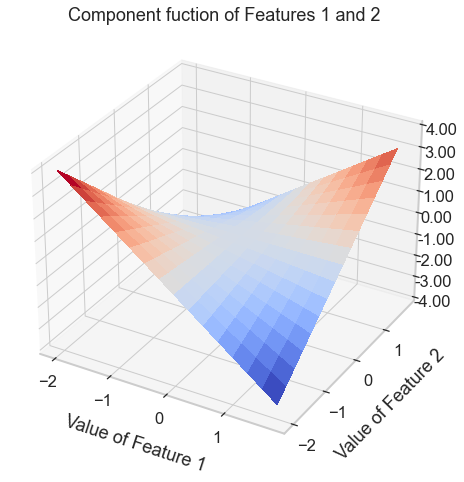

In [10]:


X = np.arange(-2, 2, 0.25)
Y = np.arange(-2, 2, 0.25)
X, Y = np.meshgrid(X, Y)
Z = np.array([f(np.array([X[i,j], Y[i,j]])) for i,j in product(range(16), range(16))]).reshape((16,16))

fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(8,8))
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_zlim(-4, 4)
ax.zaxis.set_major_formatter('{x:.02f}')
plt.xlabel('Value of Feature 1', labelpad=15)
plt.ylabel('Value of Feature 2', labelpad=15)
plt.title('Component fuction of Features 1 and 2')
plt.show()